In [158]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

### Dữ liệu được đo tại thành phố Szeged, Hungragy (UTC +2)

In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Tiền xử lí

Đổi lại các tên cột bỏ đơn vị để dễ làm việc hơn

In [3]:
df.columns = ['Formatted Date', 'Summary', 'Precip Type', 'Temperature',
       'Apparent Temperature', 'Humidity', 'Wind Speed',
       'Wind Bearing', 'Visibility', 'Loud Cover',
       'Pressure', 'Daily Summary']

Với cột Formatted Date, ta sẽ bỏ đi phần UTC phía sau vì dư thừa sau đó chuyển cột từ type string sang datetime

In [4]:
df['Formatted Date'] = df['Formatted Date'].apply(lambda x: x.split('+')[0])
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f')
df

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Loud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


### Phân tích

#### Kiểm tra nhiệt độ theo từng tháng của từng năm 

In [5]:
df_temp=df.groupby([(df['Formatted Date'].dt.year),(df['Formatted Date'].dt.month)])['Temperature'].mean().unstack()

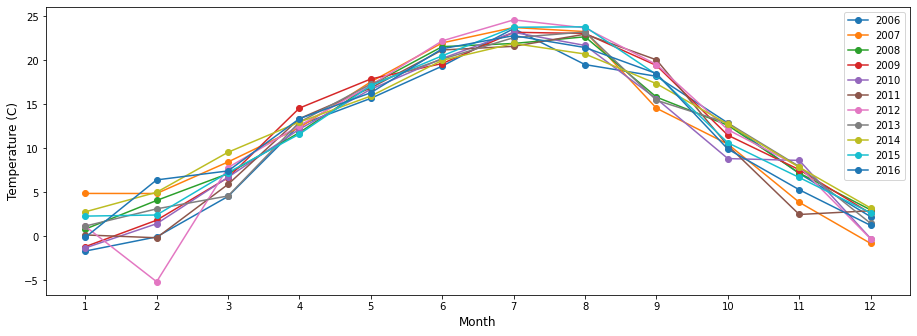

In [6]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
for i in range(2006,2017):
    plt.plot(df_temp.loc[i], marker='o',label=i)
plt.xticks(df_temp.columns)
plt.legend()
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (C)', fontsize=12)
plt.show()

Vào tháng 2 của năm 2012 thì nhiệt độ hạ thấp kỉ lục so trong suốt 10 năm ở đây.

#### Tìm mối tương quan giữa nhiệt độ biểu kiến, độ ẩm và tốc độ gió theo từng tháng trong 10 năm. Liệu rằng hai giá trị có theo chu kì hay không và có sự thay đổi giữa các năm hay không?

`Nhiệt độ biểu kiến tức Apparent temperature là nhiệt độ mà con người cảm nhận được, bị ảnh hưởng bởi độ ẩm và tốc độ gió.`

* Để vẽ biểu đồ với trục x là các tháng từng năm và hai biểu đồ đường với độ ẩm và nhiệt độ biểu kiến. Đầu tiên sẽ để Formatted Date làm index và lấy ra hai cột Apparent Temperature và Humidity đã được tính theo trung bình từng tháng. 
* Ta dùng phương thức resample và mean đồng thời để tính lại hai giá trị theo từng tháng với tham số đầu vào của mean là MS để tính theo từng tháng và ngày bắt đầu của mỗi tháng sẽ dễ nhìn hơn.

In [120]:
df_temp=df.copy()
df_temp = df_temp.set_index("Formatted Date")
df_temp = df_temp[['Temperature','Apparent Temperature','Humidity','Wind Speed']]
df_temp = df_temp.resample('MS').mean()
df_temp

,Temperature,Apparent Temperature,Humidity,Wind Speed
Formatted Date,,,,
2006-01-01,-1.674283,-4.170818,0.834651,8.902067
2006-02-01,-0.061285,-2.986136,0.843393,10.958278
2006-03-01,4.533468,1.940272,0.778654,14.416716
2006-04-01,12.625872,12.083819,0.729528,10.926802
2006-05-01,15.665315,15.555600,0.720968,10.201839
...,...,...,...,...
2016-08-01,21.433998,21.396797,0.674516,9.146423
2016-09-01,18.478465,18.366373,0.688069,6.853256
2016-10-01,9.904579,8.938837,0.799973,11.552755


<b>Vẽ biểu đồ</b>

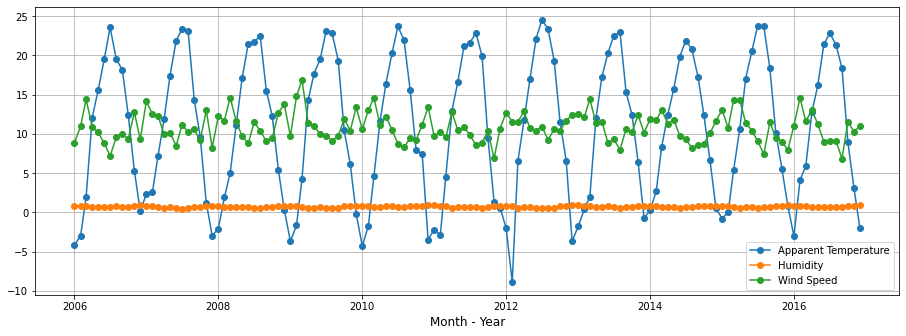

In [71]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
plt.plot(df_temp, marker='o',label=df_temp.columns)
plt.legend()
plt.xlabel('Month - Year', fontsize=12)
plt.grid()
plt.show()

<b>Quan sát:</b>
* Có thể thấy rằng nhiệt độ các năm trong từng tháng "có vẻ" như là chu kì và ở các năm, đỉnh và đáy không sai lệch nhiều. Trừ tháng 2 năm 2012 nhiệt độ thấp kỉ lục tại thành phố này trong suốt 10 năm.
* Tốc độ gió cũng có vẻ như theo một chu kì khi quan sát khi thì khoảng giữa năm đến cuối năm tốc độ gió có xu hướng giảm đi.
* Tuy nhiên từ biểu đồ trên thì độ ẩm có giá trị thấp hơn nhiều so với nhiệt độ nên không thế biết rõ là độ ẩm có thay đổi nhiều không nên ta sẽ vẽ một biểu đồ độ ẩm với trục x tương ứng với biểu đồ trên.

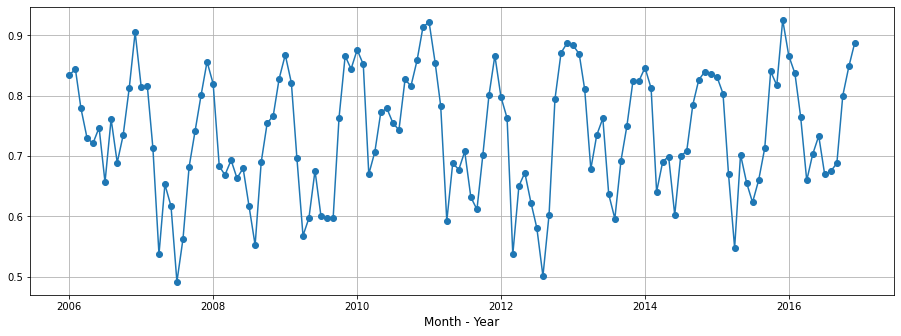

In [74]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
plt.plot(df_temp.Humidity, marker='o')
plt.xlabel('Month - Year', fontsize=12)
plt.grid()
plt.show()

Tìm mối tương quan giữa độ ẩm và nhiệt độ

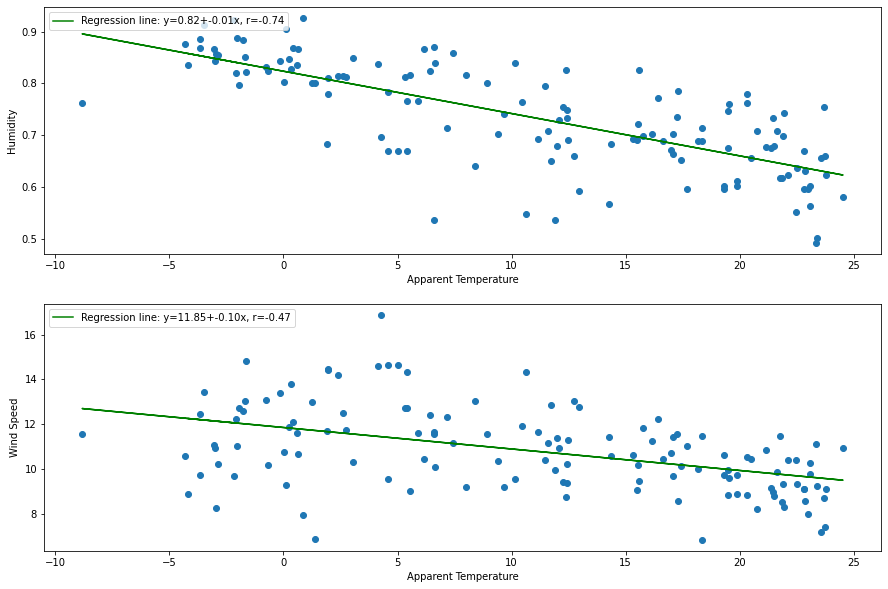

In [177]:
fig, ax = plt.subplots(2, figsize=(15, 10))
slope, intercept, r, p, stderr = stats.linregress(df_temp['Apparent Temperature'],df_temp['Humidity'])
line_humid = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
ax[0].scatter(df_temp['Apparent Temperature'],df_temp['Humidity'])
ax[0].plot(df_temp['Apparent Temperature'], intercept + slope * df_temp['Apparent Temperature'], label=line_humid,c='g')
ax[0].legend(loc='upper left')
ax[0].set_xlabel("Apparent Temperature")
ax[0].set_ylabel("Humidity")

slope, intercept, r, p, stderr = stats.linregress(df_temp['Apparent Temperature'],df_temp['Wind Speed'])
line_wind = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
ax[1].scatter(df_temp['Apparent Temperature'],df_temp['Wind Speed'])
ax[1].plot(df_temp['Apparent Temperature'], intercept + slope * df_temp['Apparent Temperature'], label=line_wind,c='g')
ax[1].legend(loc='upper left')
ax[1].set_xlabel("Apparent Temperature")
ax[1].set_ylabel("Wind Speed")
plt.show()

 <b>=> Nhiệt độ cao thì độ ẩm thấp. Đồng thời nhiệt độ cao thì tốc độ gió ở thành phố này cũng thấp.</b>

Ta sẽ decompose lần lượt các biểu đồ `Apparent Temperature, Humidity và Wind Speed` ra thành 3 biểu đồ để phân tích lần lượt là: `Trend, Seasonal và Resid` bằng hàm seasonal_decompose với model là 'additive' (các giá trị không tăng mạnh theo thời gian) với mỗi 3 tháng.

Biểu đồ Trend: Biểu diễn sự thay đổi dài hạn ở đây là theo năm.<br>
Biểu đồ Seasonal: Biểu diễn cho sự thay đổi theo mỗi tháng của từng năm.<br>
Biểu đồ Resid: Biểu diễn độ lỗi hay phần còn lại của biểu đồ gốc sau khi tách thành hai biểu đồ trên.

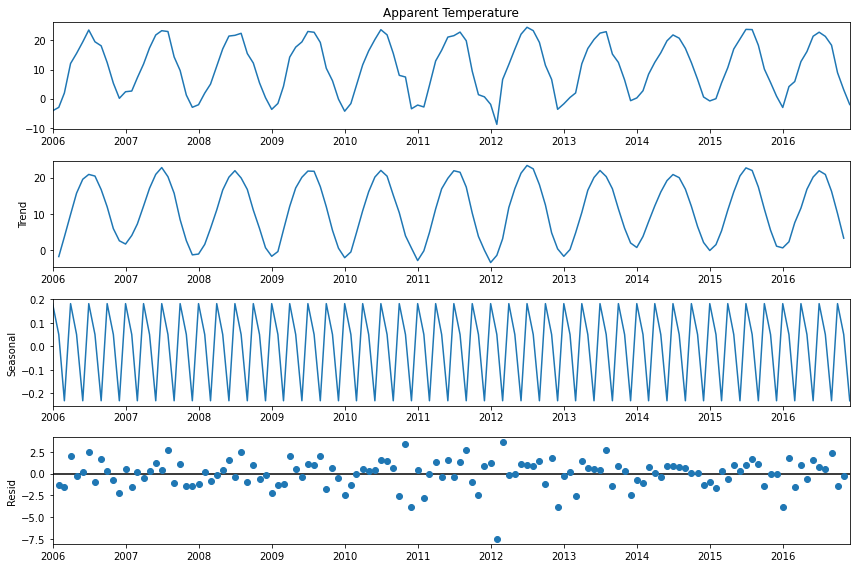

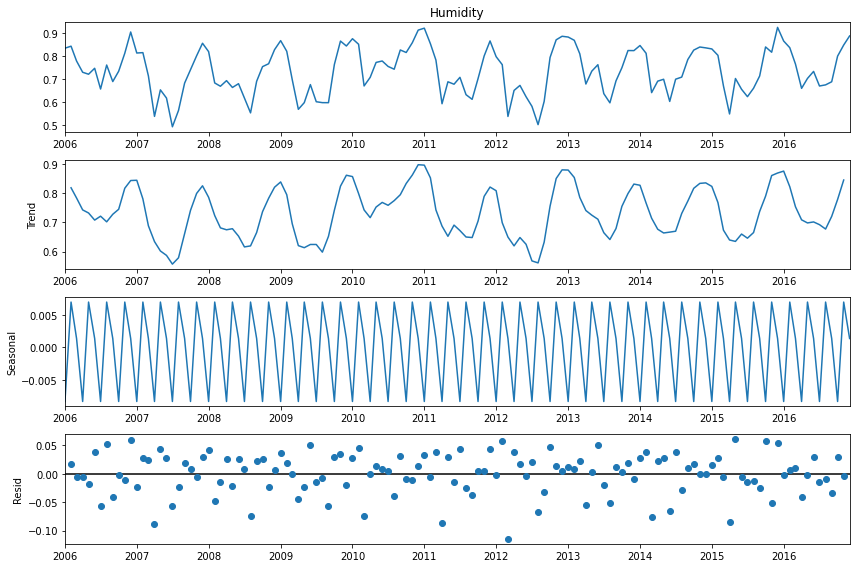

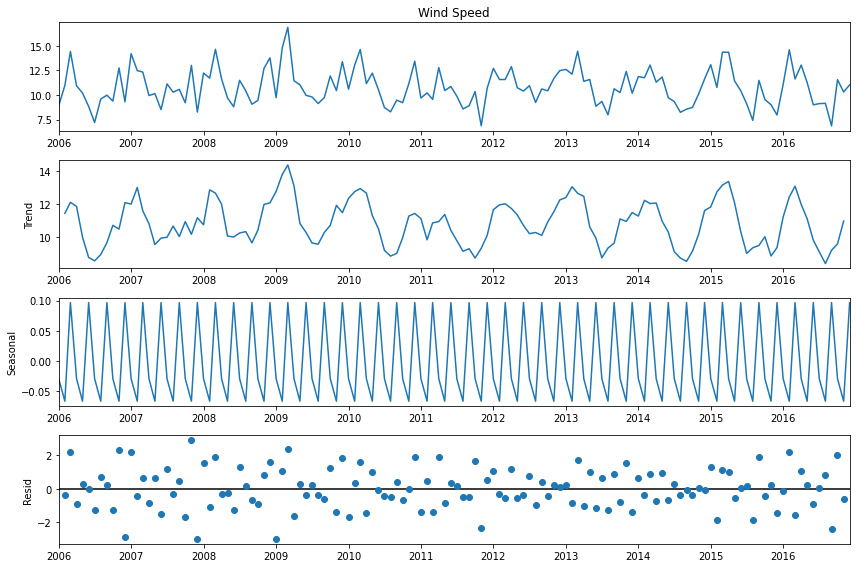

In [119]:
plt.rcParams.update({'figure.figsize': (12,8)})
result = seasonal_decompose(df_temp['Apparent Temperature'], model='additive',period=3)
result.plot()
result = seasonal_decompose(df_temp['Humidity'], model='additive',period=3)
result.plot()
result = seasonal_decompose(df_temp['Wind Speed'], model='additive',period=3)
result.plot()
plt.show()

* Ở cả 3 biểu đồ Seasonal của 3 giá trị đều có chu kì rất đều theo các tháng từng năm. Tức theo các năm giữa các tháng của các năm tương ứng thì 3 giá trị không chênh lệch nhiều và tăng giảm theo tháng cũng rất đều.<br>
<b>Quan sát biểu đồ Trend</b><br>
 * Apparent Temperature:
    * Ở biểu đồ trend của giá trị này thì giữa các năm không có xu hướng tăng hay giảm quá nhiều.<br>
    
 * Humidity:
    * Độ ẩm vào khoảng cuối và gần đầu năm là cao nhất và giảm dần về giữa năm sau đó tăng dần khi thời gian về cuối năm.<br>
 
 * Wind Speed:
    * Cùng với độ ẩm là tốc độ gió cũng mạnh khoảng đầu năm đến tháng 3, 4, sau đó giảm dần về giữa năm.<br>
 
=> <b>Vì Tốc độ gió cao và độ ẩm lại cao (mùa đông) nên nhiệt độ biểu kiến là thấp hơn so với nhiệt độ đo được (gió mạnh thổi và độ ẩm thấp thì lạnh hơn) và ngược lại vào mùa hè (tháng 6, 7). Từ điều này có thể dự đoán được nhiệt độ biểu kiến từ độ ẩm và tốc độ gió.</b>

#### Tuy nhiên khi thử so sánh cùng một tháng ở các năm (ví dụ như tháng 1).

In [145]:
df_1 = df_temp[df_temp.index.month==1]['Apparent Temperature']
print(df_1)

Formatted Date
2006-01-01   -4.170818
2007-01-01    2.386044
2008-01-01   -2.075724
2009-01-01   -3.677360
2010-01-01   -4.308296
2011-01-01   -2.190390
2012-01-01   -1.961253
2013-01-01   -1.775672
2014-01-01    0.247924
2015-01-01   -0.782512
2016-01-01   -3.027711
Freq: 12MS, Name: Apparent Temperature, dtype: float64


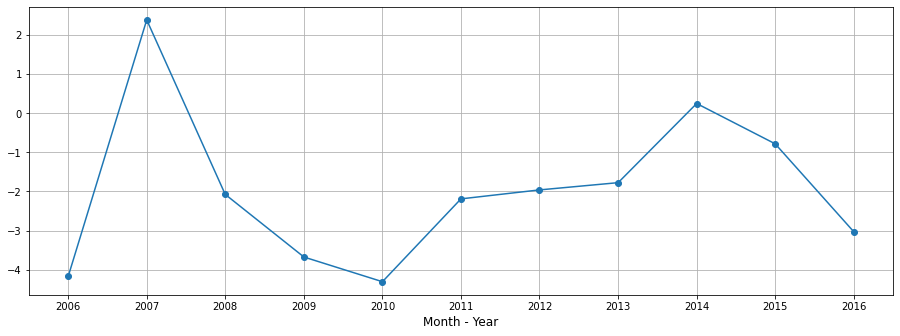

In [144]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])
plt.plot(df_1, marker='o',label=df_temp.columns)
plt.xlabel('Month - Year', fontsize=12)
plt.grid()
plt.show()

Quan sát thấy rằng vào năm 2007 thì nhiệt độ biểu kiến vào tháng 1 lại tăng cao bất thường sau đó giảm giảm vào tháng 1 của 2008. Đến năm 2014 thì lại tăng cao hơn các năm khác khá nhiều rồi lại giảm vào năm 2015.<br>
<b>Nguyên nhân có thể là do biến đổi khi hậu toàn cầu (Global Warming) đã đến hiện tượng nóng lên là toàn cầu làm thời tiết, khí hậu nhiệt độ khi dự đoán có thể sẽ bị chênh lệch ít nhiều.</b>